# 第六章 优化

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sympy
sympy.init_printing()

In [4]:
from scipy import optimize
import cvxopt

In [5]:
from scipy import optimize
import cvxopt

In [6]:
import cvxopt

In [7]:
import cvxopt

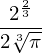

In [15]:
r, h = sympy.symbols("r, h")
Area = 2 * sympy.pi * r**2 + 2 * sympy.pi * r * h
Volume = sympy.pi * r**2 * h
h_r = sympy.solve(Volume - 1)[0]
Area_r = Area.subs(h_r)
rsol = sympy.solve(Area_r.diff(r))[0]
rsol

In [16]:
 _.evalf()

In [17]:
Area_r.diff(r, 2).subs(r, rsol)

In [18]:
Area_r.subs(r, rsol)

In [19]:
 _.evalf()

In [20]:
def f(r):
     return 2 * np.pi * r**2 + 2 / r
r_min = optimize.brent(f, brack=(0.1, 4))
r_min #0.5419260772557135
f(r_min)

In [21]:
optimize.minimize_scalar(f, bracket=(0.1, 4))

     fun: 5.535810445932086
    nfev: 19
     nit: 15
 success: True
       x: 0.5419260772557135

In [22]:
x1, x2 = sympy.symbols("x_1, x_2")
f_sym = (x1-1)**4 + 5 * (x2-1)**2 - 2*x1*x2
fprime_sym = [f_sym.diff(x_) for x_ in (x1, x2)]

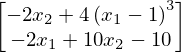

In [23]:
# Gradient
sympy.Matrix(fprime_sym)

In [24]:
fhess_sym = [[f_sym.diff(x1_, x2_) for x1_ in (x1, x2)] for x2_ in 
(x1, x2)]

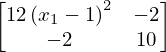

In [25]:
 # Hessian
sympy.Matrix(fhess_sym)

In [26]:
f_lmbda = sympy.lambdify((x1, x2), f_sym, 'numpy')
fprime_lmbda = sympy.lambdify((x1, x2), fprime_sym, 'numpy')
fhess_lmbda = sympy.lambdify((x1, x2), fhess_sym, 'numpy')

In [27]:
def func_XY_to_X_Y(f):

    return lambda X: np.array(f(X[0], X[1]))
f = func_XY_to_X_Y(f_lmbda)
fprime = func_XY_to_X_Y(fprime_lmbda)
fhess = func_XY_to_X_Y(fhess_lmbda)

In [28]:
x_opt = optimize.fmin_ncg(f, (0, 0), fprime=fprime, fhess=fhess)

x_opt

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 17
         Hessian evaluations: 8


array([1.88292613, 1.37658523])

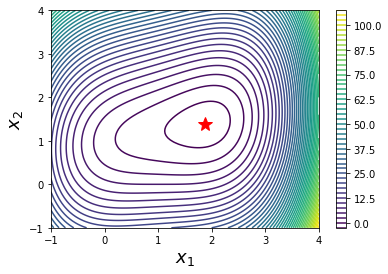

In [29]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, f_lmbda(X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

In [30]:
x_opt = optimize.fmin_bfgs(f, (0, 0), fprime=fprime)
x_opt

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13


array([1.88292645, 1.37658596])

In [31]:
x_opt = optimize.fmin_cg(f, (0, 0), fprime=fprime)
x_opt

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 18
         Gradient evaluations: 18


array([1.88292612, 1.37658523])

In [32]:
x_opt = optimize.fmin_bfgs(f, (0, 0))
x_opt

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 52
         Gradient evaluations: 13


array([1.88292645, 1.37658596])

In [33]:
def f(X):
    x, y = X
    return (4 * np.sin(np.pi * x) + 6 * np.sin(np.pi * y)) + (x - 1)**2 + (y - 1)**2

In [34]:
x_start = optimize.brute(f, (slice(-3, 5, 0.5), slice(-3, 5, 0.5)), finish=None)
x_start

f(x_start)

In [35]:
x_opt = optimize.fmin_bfgs(f, x_start)
x_opt
f(x_opt)

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 4
         Function evaluations: 28
         Gradient evaluations: 7


In [36]:
def func_X_Y_to_XY(f, X, Y):

    s = np.shape(X)
    return f(np.vstack([X.ravel(), Y.ravel()])).reshape(*s)

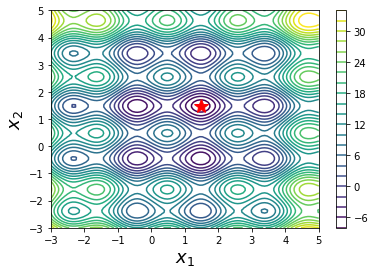

In [37]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-3, 5, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 25)
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

In [38]:
x_opt = optimize.fmin_bfgs(f, x_start)
result = optimize.minimize(f, x_start, method= 'BFGS')
x_opt = result.x

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 4
         Function evaluations: 28
         Gradient evaluations: 7


In [39]:
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)

In [40]:
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

In [41]:
def g(beta):
    return ydata - f(xdata, *beta)
beta_start = (1, 1, 1)
beta_opt, beta_cov = optimize.leastsq(g, beta_start)
beta_opt

array([0.25330454, 0.77125787, 0.56033692])

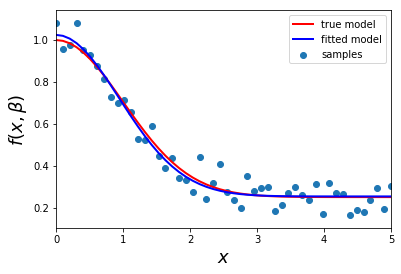

In [42]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='samples')
ax.plot(xdata, y, 'r', lw=2, label='true model')
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2, label='fitted model')
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
ax.legend()

In [43]:
beta_opt, beta_cov = optimize.curve_fit(f, xdata, ydata)
beta_opt

array([0.25330454, 0.77125787, 0.56033692])

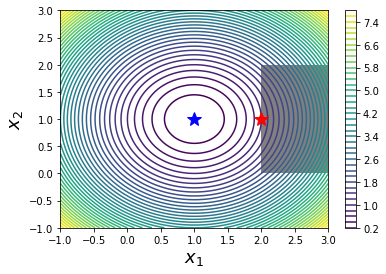

In [44]:
def f(X):
    x, y = X
    return (x - 1)**2 + (y - 1)**2
x_opt = optimize.minimize(f, [1, 1], method='BFGS').x
bnd_x1, bnd_x2 = (2, 3), (0, 2)
x_cons_opt = optimize.minimize(f, [1, 1], method='L-BFGS-B',bounds=[bnd_x1, bnd_x2]).x
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)
bound_rect = plt.Rectangle((bnd_x1[0], bnd_x2[0]),
bnd_x1[1] - bnd_x1[0], bnd_x2[1] - 
bnd_x2[0], facecolor="grey")
ax.add_patch(bound_rect)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

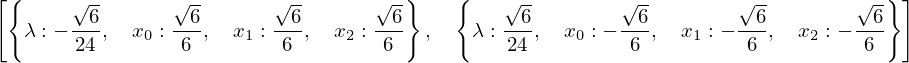

In [45]:
x = x0, x1, x2, l = sympy.symbols("x_0, x_1, x_2, lambda")
f = x0 * x1 * x2
g = 2 * (x0 * x1 + x1 * x2 + x2 * x0) - 1
L = f + l * g
grad_L = [sympy.diff(L, x_) for x_ in x]
sols = sympy.solve(grad_L)
sols

In [46]:
g.subs(sols[0])

In [47]:
 f.subs(sols[0])

In [48]:
def f(X):
    return -X[0] * X[1] * X[2]
def g(X):
    return 2 * (X[0]*X[1] + X[1] * X[2] + X[2] * X[0]) - 1

In [49]:
constraint = dict(type='eq', fun=g)
result = optimize.minimize(f, [0.5, 1, 1.5], method='SLSQP', 
constraints=[constraint])
result
result.x

array([0.40824188, 0.40825127, 0.40825165])

In [50]:
 def f(X):
    return (X[0] - 1)**2 + (X[1] - 1)**2
def g(X):
    return X[1] - 1.75 - (X[0] - 0.75)**4
constraints = [dict(type='ineq', fun=g)]

In [51]:
x_opt = optimize.minimize(f, (0, 0), method='BFGS').x
x_cons_opt = optimize.minimize(f, (0, 0), method='SLSQP', constraints=constraints).x

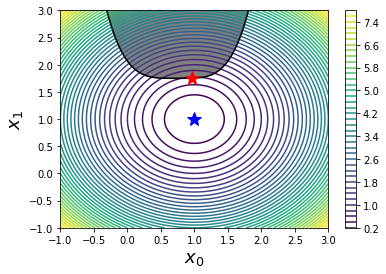

In [52]:
fig, ax = plt.subplots(figsize=(6, 4))
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)
ax.plot(x_, 1.75 + (x_-0.75)**4, 'k-', markersize=15)
ax.fill_between(x_, 1.75 + (x_-0.75)**4, 3, color='grey')
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)
ax.set_ylim(-1, 3)
ax.set_xlabel(r"$x_0$", fontsize=18)
ax.set_ylabel(r"$x_1$", fontsize=18)
plt.colorbar(c, ax=ax)

In [54]:
c = np.array([-1.0, 2.0, -3.0])
A = np.array([[ 1.0, 1.0, 0.0],
 [-1.0, 3.0, 0.0],
 [ 0.0, -1.0, 1.0]])
b = np.array([1.0, 2.0, 3.0])
A_ = cvxopt.matrix(A)
b_ = cvxopt.matrix(b)
c_ = cvxopt.matrix(c)
sol = cvxopt.solvers.lp(c_, A_, b_)

sol

Optimal solution found.


{'x': <3x1 matrix, tc='d'>,
 'y': <0x1 matrix, tc='d'>,
 's': <3x1 matrix, tc='d'>,
 'z': <3x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 0.0,
 'relative gap': 0.0,
 'primal objective': -10.0,
 'dual objective': -10.0,
 'primal infeasibility': 0.0,
 'primal slack': -0.0,
 'dual slack': 0.0,
 'dual infeasibility': 1.4835979218054372e-16,
 'residual as primal infeasibility certificate': None,
 'residual as dual infeasibility certificate': None,
 'iterations': 0}

In [55]:
x = np.array(sol['x'])
sol['primal objective']

# 第九章插值


In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy

In [102]:
sympy.init_printing()

In [103]:
t, k, T0, Ta = sympy.symbols("t, k, T_0, T_a")
T = sympy.Function("T")

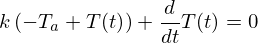

In [104]:
ode = T(t).diff(t) + k*(T(t) - Ta)
sympy.Eq(ode)

In [105]:
ode_sol = sympy.dsolve(ode)
ode_sol

In [106]:
ode_sol.lhs

In [107]:
p1.domain

array([-1.,  1.])

In [108]:
ode_sol.rhs

In [64]:
 p1(np.array([1.5, 2.5, 3.5]))

array([10.75, 24.75, 44.75])

In [111]:
ics = {T(0): T0}
ics
C_eq

In [110]:
C_eq = ode_sol.subs(t, 0).subs(ics)

In [112]:
C_sol = sympy.solve(C_eq)
C_sol

In [113]:
 ode_sol.subs(C_sol[0])

In [117]:
def apply_ics(sol, ics, x, known_params):

    free_params = sol.free_symbols - set(known_params)
    eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)). subs(x, 0).subs(ics) for n in range(len(ics))]
    sol_params = sympy.solve(eqs, free_params)
    return sol.subs(sol_params)
ode_sol
apply_ics(ode_sol, ics, t, [k, Ta])

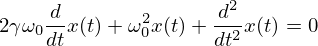

In [120]:
t, omega0, gamma= sympy.symbols("t, omega_0, gamma", positive=True)
x = sympy.Function("x")
ode = x(t).diff(t, 2) + 2 * gamma * omega0 * x(t).diff(t) + omega0**2 * x(t)
sympy.Eq(ode)

In [122]:
ode_sol = sympy.dsolve(ode)
ode_sol

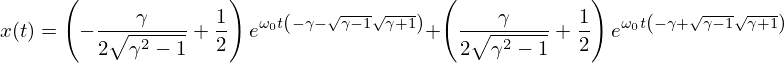

In [123]:
ics = {x(0): 1, x(t).diff(t).subs(t, 0): 0}
ics
x_t_sol = apply_ics(ode_sol, ics, t, [omega0, gamma])
x_t_sol

In [124]:
x_t_critical = sympy.limit(x_t_sol.rhs, gamma, 1)
x_t_critical

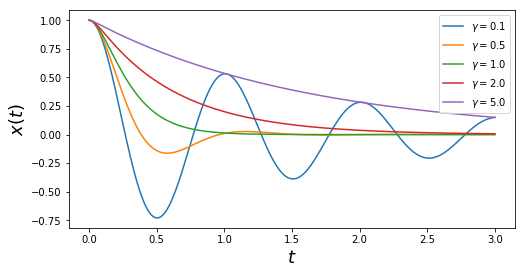

In [130]:
fig, ax = plt.subplots(figsize=(8, 4))
tt = np.linspace(0, 3, 250)
w0 = 2 * sympy.pi
for g in [0.1, 0.5, 1, 2.0, 5.0]:
    if g == 1:
        x_t = sympy.lambdify(t, x_t_critical.subs({omega0: w0}), 'numpy')
    else:
        x_t = sympy.lambdify(t, x_t_sol.rhs.subs({omega0: w0, gamma: g}), 'numpy')
    ax.plot(tt, x_t(tt).real, label=r"$\gamma = %.1f$" % g)
    ax.set_xlabel(r"$t$", fontsize=18)
    ax.set_ylabel(r"$x(t)$", fontsize=18)
ax.legend()

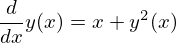

In [132]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x
sympy.Eq(y(x).diff(x), f)

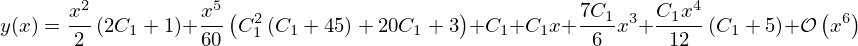

In [133]:
sympy.dsolve(y(x).diff(x) - f)

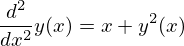

In [134]:
sympy.Eq(y(x).diff(x, x), f)

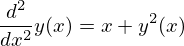

In [135]:
 sympy.Eq(y(x).diff(x, x), f)

In [139]:
def plot_direction_field(x, y_x, f_xy, x_lim=(-5, 5), y_lim=(-5, 5), ax=None):
    f_np = sympy.lambdify((x, y_x), f_xy, 'numpy')
    x_vec = np.linspace(x_lim[0], x_lim[1], 20)
    y_vec = np.linspace(y_lim[0], y_lim[1], 20)

    if ax is None:
        _, ax = plt.subplots(figsize=(4, 4))

    dx = x_vec[1] - x_vec[0]
    dy = y_vec[1] - y_vec[0]

    for m, xx in enumerate(x_vec):
        for n, yy in enumerate(y_vec):
            Dy = f_np(xx, yy) * dx
            Dx = 0.8 * dx**2 / np.sqrt(dx**2 + Dy**2)
            Dy = 0.8 * Dy*dy / np.sqrt(dx**2 + Dy**2)
            ax.plot([xx - Dx/2, xx + Dx/2],[yy - Dy/2, yy + Dy/2], 'b', lw=0.5)
    ax.axis('tight')
    ax.set_title(r"$%s$" %(sympy.latex(sympy.Eq(y(x).diff(x), f_xy))),fontsize=18)
    return ax


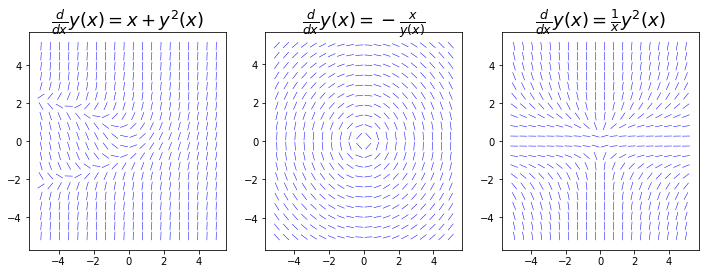

In [140]:
x = sympy.symbols("x")
y = sympy.Function("y")
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
plot_direction_field(x, y(x), y(x)**2 + x, ax=axes[0])
plot_direction_field(x, y(x), -x / y(x), ax=axes[1])
plot_direction_field(x, y(x), y(x)**2 / x, ax=axes[2])

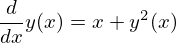

In [141]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x
sympy.Eq(y(x).diff(x), f)

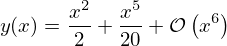

In [142]:
ics = {y(0): 0}
ode_sol = sympy.dsolve(y(x).diff(x) - f, ics=ics)
ode_sol

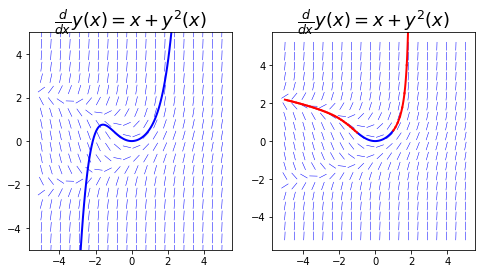

In [143]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
# left panel
plot_direction_field(x, y(x), f, ax=axes[0])
x_vec = np.linspace(-3, 3, 100)
axes[0].plot(x_vec, sympy.lambdify(x, ode_sol.rhs.removeO())
(x_vec), 'b', lw=2)
axes[0].set_ylim(-5, 5)

# right panel
plot_direction_field(x, y(x), f, ax=axes[1])
x_vec = np.linspace(-1, 1, 100)
axes[1].plot(x_vec, sympy.lambdify(x, ode_sol.rhs.removeO())
(x_vec), 'b', lw=2)           
# iteratively resolve the ODE with updated initial conditions
ode_sol_m = ode_sol_p = ode_sol
dx = 0.125
# positive x
for x0 in np.arange(1, 2., dx):
    x_vec = np.linspace(x0, x0 + dx, 100)
    ics = {y(x0): ode_sol_p.rhs.removeO().subs(x, x0)}
    ode_sol_p = sympy.dsolve(y(x).diff(x) - f, ics=ics, n=6)
    axes[1].plot(x_vec, sympy.lambdify(x, ode_sol_p.rhs.removeO())
(x_vec), 'r', lw=2)
# negative x
for x0 in np.arange(-1, -5, -dx):
    x_vec = np.linspace(x0, x0 - dx, 100)
    ics = {y(x0): ode_sol_m.rhs.removeO().subs(x, x0)}
    ode_sol_m = sympy.dsolve(y(x).diff(x) - f, ics=ics, n=6)
    axes[1].plot(x_vec, sympy.lambdify(x, ode_sol_m.rhs.removeO())
(x_vec), 'r', lw=2)

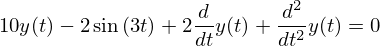

In [145]:
t = sympy.symbols("t", positive=True)
y = sympy.Function("y")
ode = y(t).diff(t, 2) + 2 * y(t).diff(t) + 10 * y(t) - 2 * sympy.sin(3*t)
sympy.Eq(ode)

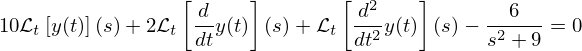

In [146]:
s, Y = sympy.symbols("s, Y", real=True)
L_y = sympy.laplace_transform(y(t), t, s)
L_y

L_ode = sympy.laplace_transform(ode, t, s, noconds=True)
sympy.Eq(L_ode)

In [184]:
def laplace_transform_derivatives(e):

    if isinstance(e, sympy.LaplaceTransform):
        if isinstance(e.args[0], sympy.Derivative):
            d, t, s = e.args
            n = len(d.args) - 1
            return ((s**n) * sympy.LaplaceTransform(d.args[0], t, s) -sum([s**(n-i) * sympy.diff(d.args[0], t, i-1).subs(t, 0) for i in range(1, n+1)]))

    if isinstance(e, (sympy.Add, sympy.Mul)):
        t = type(e)
        return t(*[laplace_transform_derivatives(arg) for arg in e.args])

    return e

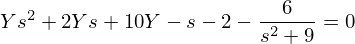

In [190]:
L_ode_2 = laplace_transform_derivatives(L_ode)
sympy.Eq(L_ode_2)
L_ode_3 = L_ode_2.subs(L_y, Y)
sympy.Eq(L_ode_3)
L_ode_4 = L_ode_3.subs(ics)
sympy.Eq(L_ode_4)

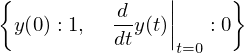

In [152]:
ics = {y(0): 1, y(t).diff(t).subs(t, 0): 0}
ics

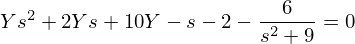

In [191]:
L_ode_4 = L_ode_3.subs(ics)
sympy.Eq(L_ode_4)

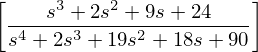

In [192]:
Y_sol = sympy.solve(L_ode_4, Y)
Y_sol

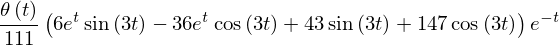

In [193]:
y_sol = sympy.inverse_laplace_transform(Y_sol[0], s, t)
sympy.simplify(y_sol)

In [157]:
x = sympy.symbols("x")
y = sympy.Function("y")
f = y(x)**2 + x

In [158]:
 f_np = sympy.lambdify((y(x), x), f)

In [159]:
y0 = 0
xp = np.linspace(0, 1.9, 100)
yp = integrate.odeint(f_np, y0, xp)

In [160]:
xm = np.linspace(0, -5, 100)
ym = integrate.odeint(f_np, y0, xm)

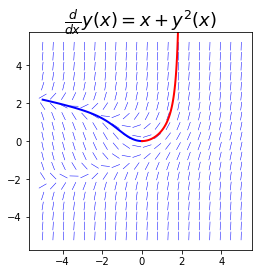

In [161]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
plot_direction_field(x, y(x), f, ax=ax)
ax.plot(xm, ym, 'b', lw=2)
ax.plot(xp, yp, 'r', lw=2)

In [163]:
a, b, c, d = 0.4, 0.002, 0.001, 0.7
def f(xy, t):
    x, y = xy
    return [a * x - b * x * y, c * x * y - d * y]

In [164]:
xy0 = [600, 400]
t = np.linspace(0, 50, 250)
xy_t = integrate.odeint(f, xy0, t)
xy_t.shape


Text(0,0.5,'Number of predators')

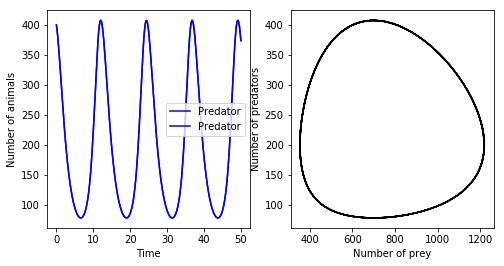

In [168]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(t, xy_t[:,1], 'b', label="Predator")
axes[0].plot(t, xy_t[:,1], 'b', label="Predator")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Number of animals")
axes[0].legend()
axes[1].plot(xy_t[:,0], xy_t[:,1], 'k')
axes[1].set_xlabel("Number of prey")
axes[1].set_ylabel("Number of predators")

In [170]:
def f(xyz, t, sigma, rho, beta):
    x, y, z = xyz
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]
sigma, rho, beta = 8, 28, 8/3.0
t = np.linspace(0, 25, 10000)
xyz0 = [1.0, 1.0, 1.0]
xyz1 = integrate.odeint(f, xyz0, t, args=(sigma, rho, beta))
xyz2 = integrate.odeint(f, xyz0, t, args=(sigma, rho, 0.6*beta))
xyz3 = integrate.odeint(f, xyz0, t, args=(2*sigma, rho, 0.6*beta))


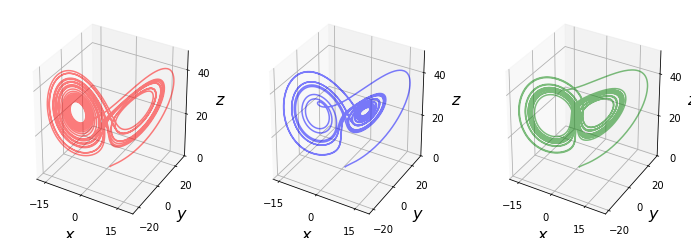

In [171]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4),subplot_kw={'projection':'3d'})
for ax, xyz, c in [(ax1, xyz1, 'r'), (ax2, xyz2, 'b'), (ax3, xyz3, 'g')]:
    ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], c, alpha=0.5)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.set_zlabel('$z$', fontsize=16)
    ax.set_xticks([-15, 0, 15])
    ax.set_yticks([-20, 0, 20])
    ax.set_zticks([0, 20, 40])

In [172]:
 def f(t, y, args):
    m1, k1, g1, m2, k2, g2 = args
    return [y[1], - k1/m1 * y[0] + k2/m1 * (y[2] - y[0]) - g1/m1 * y[1],y[3], - k2/m2 * (y[2] - y[0]) - g2/m2 * y[3]]


In [173]:
m1, k1, g1 = 1.0, 10.0, 0.5
m2, k2, g2 = 2.0, 40.0, 0.25
args = (m1, k1, g1, m2, k2, g2)
y0 = [1.0, 0, 0.5, 0]
t = np.linspace(0, 20, 1000)
r = integrate.ode(f)
r.set_integrator('lsoda');
r.set_initial_value(y0, t[0]);
r.set_f_params(args);
dt = t[1] - t[0]
y = np.zeros((len(t), len(y0)))
idx = 0
while r.successful() and r.t < t[-1]:
    y[idx, :] = r.y
    r.integrate(r.t + dt)
    idx += 1

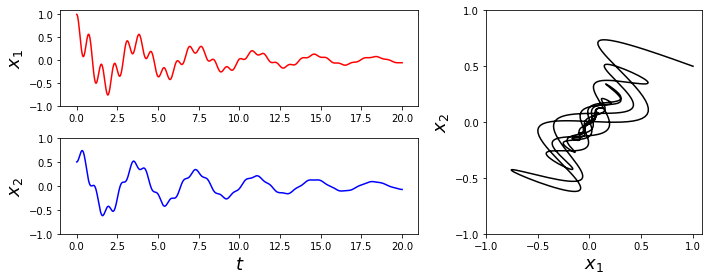

In [174]:
fig = plt.figure(figsize=(10, 4))
 ...: ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
 ...: ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
 ...: ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)
 ...: # x_1 vs time plot
 ...: ax1.plot(t, y[:, 0], 'r')
 ...: ax1.set_ylabel('$x_1$', fontsize=18)
 ...: ax1.set_yticks([-1, -.5, 0, .5, 1])
 ...: # x2 vs time plot
 ...: ax2.plot(t, y[:, 2], 'b')
 ...: ax2.set_xlabel('$t$', fontsize=18)
 ...: ax2.set_ylabel('$x_2$', fontsize=18)
 ...: ax2.set_yticks([-1, -.5, 0, .5, 1])
 ...: # x1 and x2 phase space plot
 ...: ax3.plot(y[:, 0], y[:, 2], 'k')
 ...: ax3.set_xlabel('$x_1$', fontsize=18)
 ...: ax3.set_ylabel('$x_2$', fontsize=18)
 ...: ax3.set_xticks([-1, -.5, 0, .5, 1])
 ...: ax3.set_yticks([-1, -.5, 0, .5, 1])
 ...: fig.tight_layout()

In [176]:
def jac(t, y, args):
    m1, k1, g1, m2, k2, g2 = args
    return [[0, 1, 0, 0], [- k1/m2 - k2/m1, - g1/m1 * y[1], k2/m1, 0],[0, 0, 1, 0],[k2/m2, 0, - k2/m2, - g2/m2]]
r = integrate.ode(f, jac)
r.set_jac_params(args);

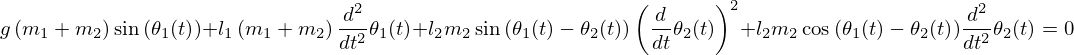

In [177]:
t, g, m1, l1, m2, l2 = sympy.symbols("t, g, m_1, l_1, m_2, l_2")
theta1, theta2 = sympy.symbols("theta_1, theta_2", cls=sympy.Function)
ode1 = sympy.Eq((m1+m2)*l1 * theta1(t).diff(t,t) +m2*l2 * theta2(t).diff(t,t) * sympy.
cos(theta1(t)-theta2(t)) +m2*l2 * theta2(t).diff(t)**2 * sympy.
sin(theta1(t)-theta2(t)) +g*(m1+m2) * sympy.sin(theta1(t)))
ode1

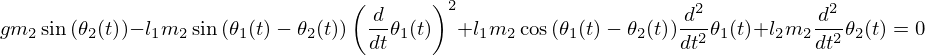

In [178]:
ode2 = sympy.Eq(m2*l2 * theta2(t).diff(t,t) +m2*l1 * theta1(t).diff(t,t) * sympy.
cos(theta1(t)-theta2(t)) - m2*l1 * theta1(t).diff(t)**2 * sympy.
sin(theta1(t) - theta2(t)) +m2*g * sympy.sin(theta2(t)))
ode2

In [179]:
y1, y2, y3, y4 = sympy.symbols("y_1, y_2, y_3, y_4", cls=sympy.Function)
varchange = {theta1(t).diff(t, t): y2(t).diff(t),theta1(t): y1(t),theta2(t).diff(t, t): y4(t).diff(t),theta2(t): y3(t)}
ode1_vc = ode1.subs(varchange)
ode2_vc = ode2.subs(varchange)

ode3 = y1(t).diff(t) - y2(t)
ode4 = y3(t).diff(t) - y4(t)
y = sympy.Matrix([y1(t), y2(t), y3(t), y4(t)])
vcsol = sympy.solve((ode1_vc, ode2_vc, ode3, ode4), y.diff(t), dict=True)
f = y.diff(t).subs(vcsol[0])
params = {m1: 5.0, l1: 2.0, m2: 1.0, l2: 1.0, g: 10.0}
_f_np = sympy.lambdify((t, y), f.subs(params), 'numpy')
f_np = lambda _t, _y, *args: _f_np(_t, _y)
jac = sympy.Matrix([[fj.diff(yi) for yi in y] for fj in f])
_jac_np = sympy.lambdify((t, y), jac.subs(params), 'numpy')
jac_np = lambda _t, _y, *args: _jac_np(_t, _y)

In [180]:
y0 = [2.0, 0, 0, 0]
tt = np.linspace(0, 20, 1000)
r = integrate.ode(f_np, jac_np).set_initial_value(y0, tt[0])
dt = tt[1] - tt[0]
yy = np.zeros((len(tt), len(y0)))
idx = 0
while r.successful() and r.t < tt[-1]:
    yy[idx, :] = r.y
    r.integrate(r.t + dt)
    idx += 1

In [181]:
theta1_np, theta2_np = yy[:, 0], yy[:, 2]
x1 = params[l1] * np.sin(theta1_np)
y1 = -params[l1] * np.cos(theta1_np)
x2 = x1 + params[l2] * np.sin(theta2_np)
y2 = y1 - params[l2] * np.cos(theta2_np)
    

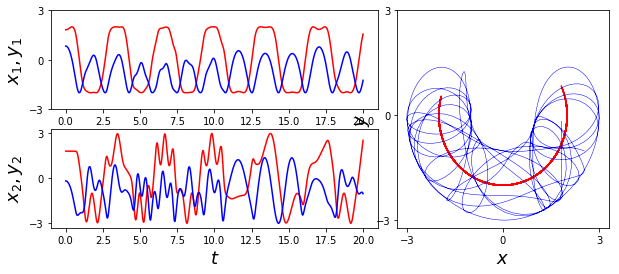

In [182]:
fig = plt.figure(figsize=(10, 4))
 ...: ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
 ...: ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
 ...: ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)
 ...:
 ...: ax1.plot(tt, x1, 'r')
 ...: ax1.plot(tt, y1, 'b')
 ...: ax1.set_ylabel('$x_1, y_1$', fontsize=18)
 ...: ax1.set_yticks([-3, 0, 3])
 ...:
 ...: ax2.plot(tt, x2, 'r')
 ...: ax2.plot(tt, y2, 'b')
 ...: ax2.set_xlabel('$t$', fontsize=18)
...: ax2.set_ylabel('$x_2, y_2$', fontsize=18)
 ...: ax2.set_yticks([-3, 0, 3])
 ...:
 ...: ax3.plot(x1, y1, 'r')
 ...: ax3.plot(x2, y2, 'b', lw=0.5)
 ...: ax3.set_xlabel('$x$', fontsize=18)
 ...: ax3.set_ylabel('$y$', fontsize=18)
 ...: ax3.set_xticks([-3, 0, 3])
 ...: ax3.set_yticks([-3, 0, 3])